In [ ]:
!pip install pandas-profiling==3.4.0
!pip install catboost
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# please install holidays and verstack before running this notebook :)
from pandas_profiling import ProfileReport
import decimal
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, space_eval

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import TSNE

from sklearn import datasets
from matplotlib import offsetbox

import pandas_profiling
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly

from sklearn.linear_model import Ridge
from sklearn.linear_model import PoissonRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer
from sklearn import set_config
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin


import warnings
import random

seed = 42

from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Data Preparation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW9/data/hour.csv"
data = pd.read_csv(path, sep=",")
data

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [ ]:
print(data.shape)
print(data.dtypes.value_counts())
print(data.dtypes)

(17379, 17)
int64      12
float64     4
object      1
dtype: int64
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Instant is just the id, so I will delete that column.

In [ ]:
if "instant" in data.columns:
  data = data.drop(["instant"], axis=1)

In [ ]:
data["dteday"] = pd.to_datetime(data["dteday"])

As we have the date information in other forms like season, year, monthm holiday, weekday, I will drop the "dteday" column as it will not add value to the model.

In [ ]:
if "dteday" in data.columns:
  data = data.drop(["dteday"], axis=1)

In [ ]:
print(data.isnull().sum())

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Given the context of the data I think deleteing outliers would be meaningless in these case as they may not be outliers but rather specific days with high activity.

# 2. EDA

In [ ]:
report = pandas_profiling.ProfileReport(data)

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


<AxesSubplot:>

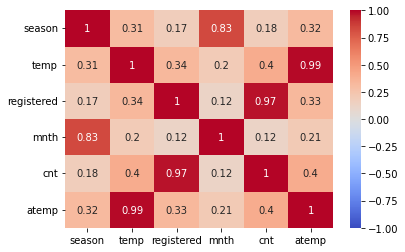

In [ ]:
top_corr_cols = []
cols = list(data.columns)
print(cols)
for col in cols:
  corr = data.corr()
  condition = np.absolute(corr[col]) > 0.8
  top_corr = corr.loc[condition,condition]
  col_list = list(top_corr.columns)
  col_list.remove(col)
  top_corr_cols += col_list
top_corr_cols = set(top_corr_cols)
top_corr_cols = list(top_corr_cols)
corr = data[top_corr_cols].corr()
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

Here we can observe some interesting correlations. As expected there is high correlation between the pairs of features seasons - months, and atemp - temp(for the temps I think leaving one of those feature is enough as they are perfectly correlated, so we will not lose any information, however I will leave them both to compare them later as asked in the assignment). Interestingly enough the correlation between cnt and registered is also extremely high, aslo indicating that most of the users are registerd.

In [ ]:
# if "atemp" in data.columns:
#   data = data.drop(["atemp"], axis=1)
#   top_corr_cols.remove("atemp")

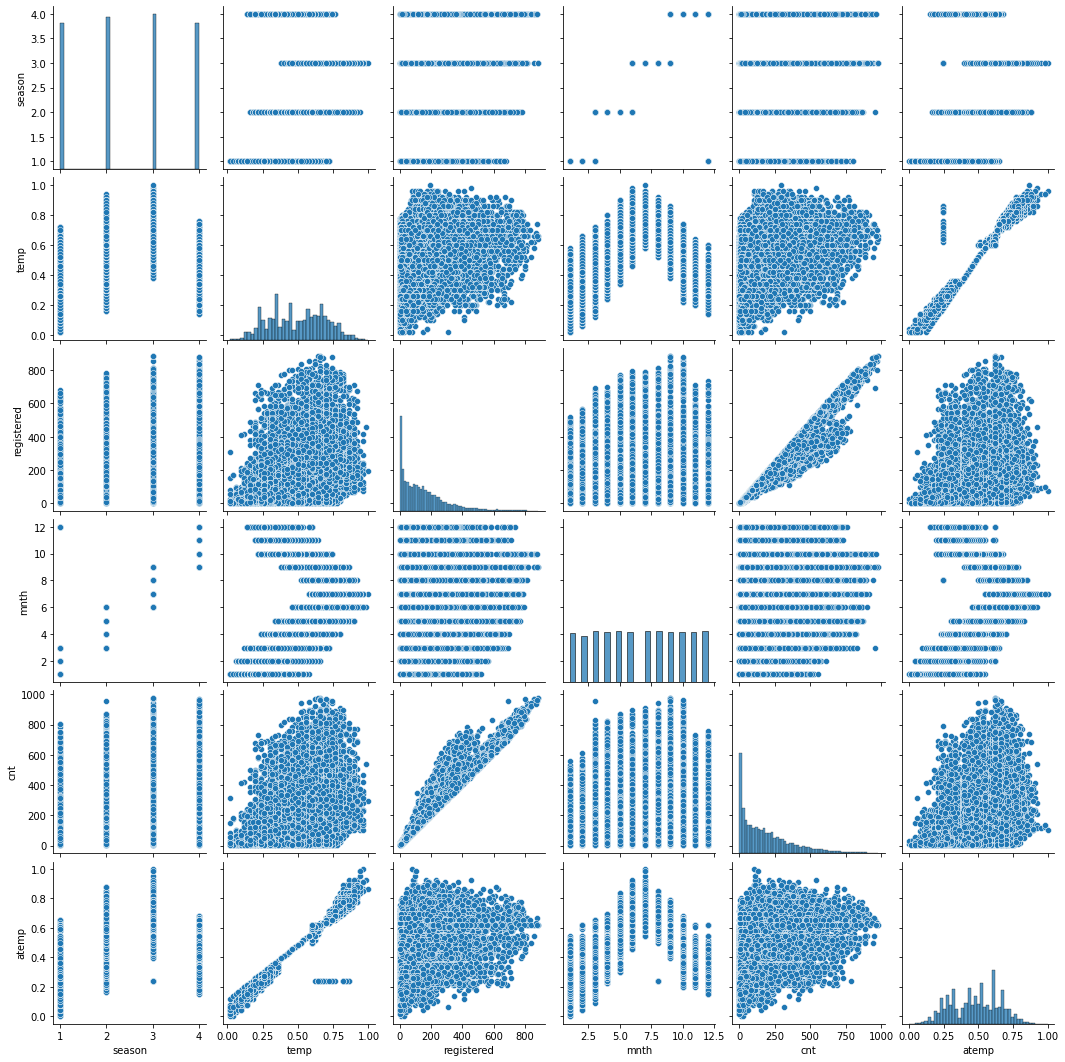

In [ ]:
pairwise_plots = sns.pairplot(data[top_corr_cols])

Here are the top correlations with the target feature.

season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


<AxesSubplot:>

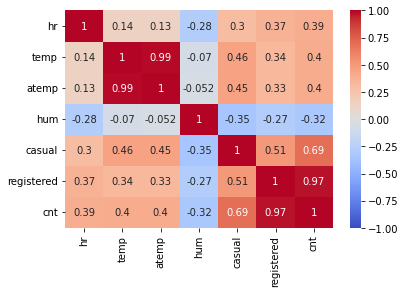

In [ ]:
corr = data.corr()
print(corr["cnt"])
condition = np.abs(corr["cnt"]) > 0.3
top_corr = corr.loc[condition, condition]
sns.heatmap(top_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

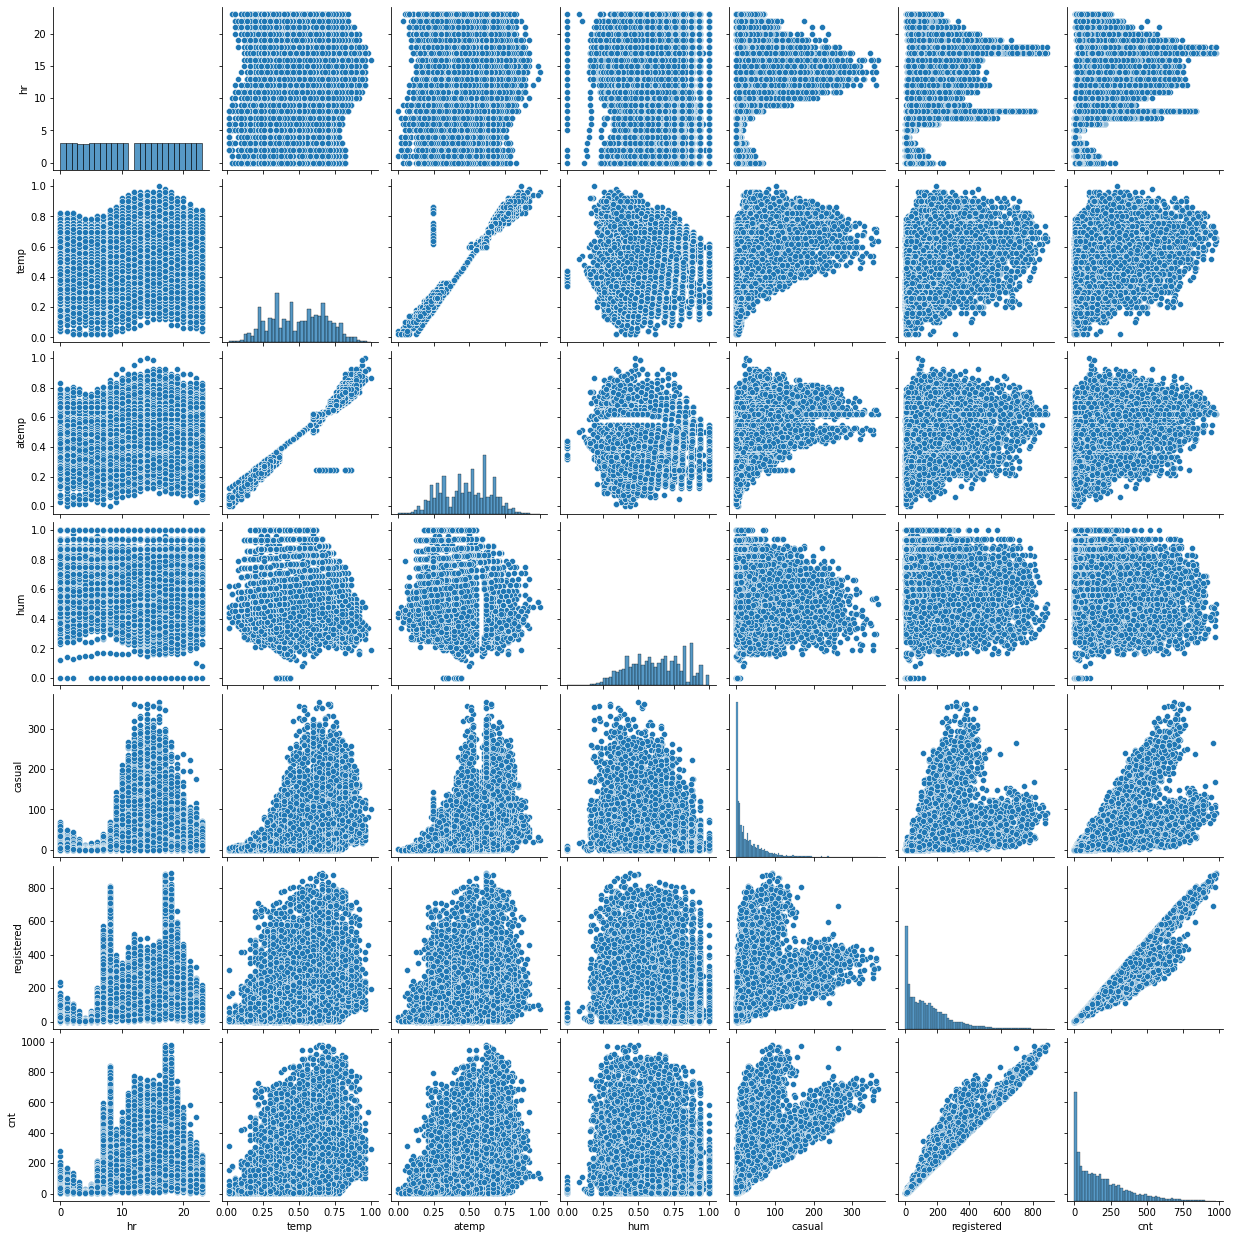

In [ ]:
pairwise_plots = sns.pairplot(data[list(top_corr.columns)])

Here I will visualize the relationship of each variable with the target variable.

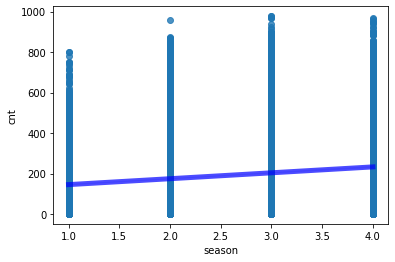

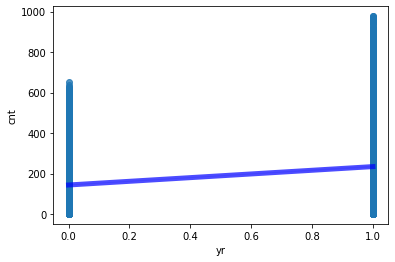

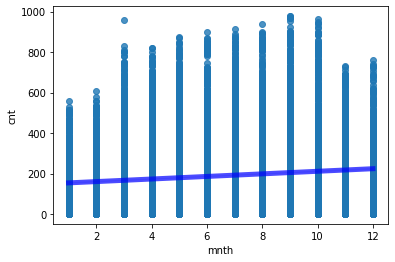

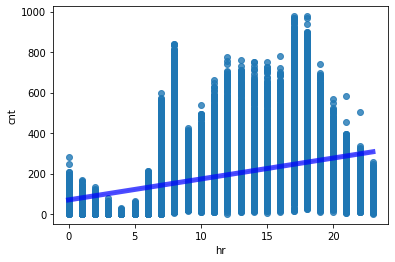

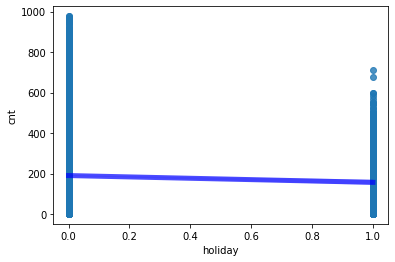

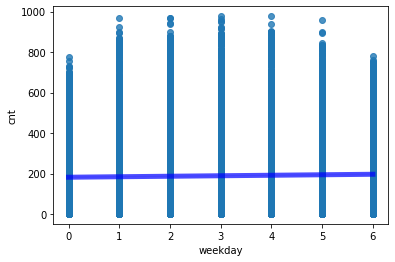

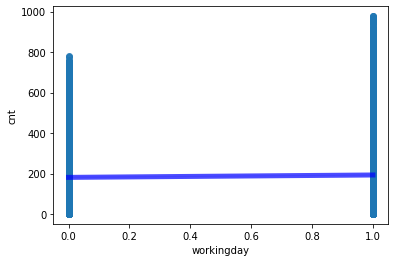

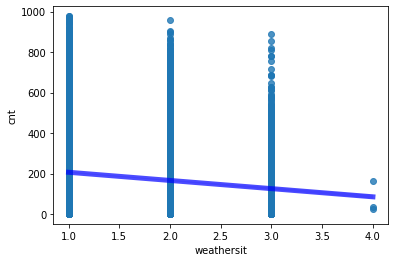

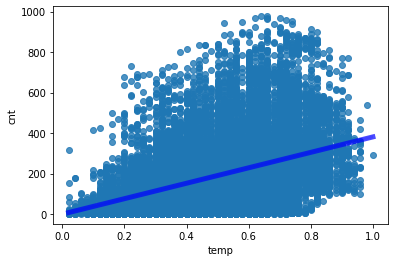

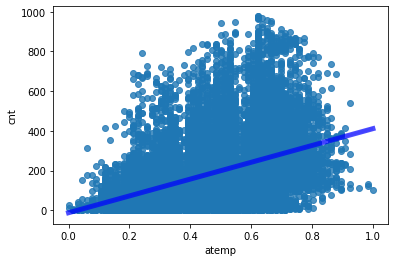

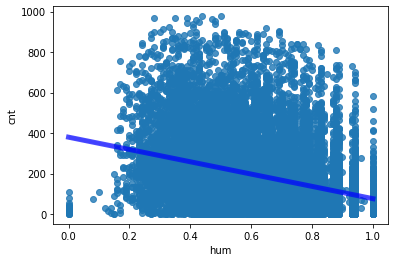

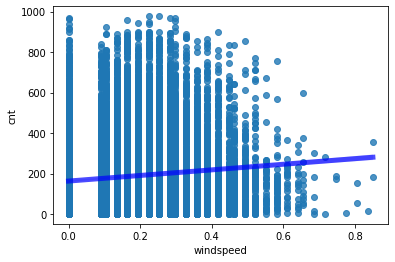

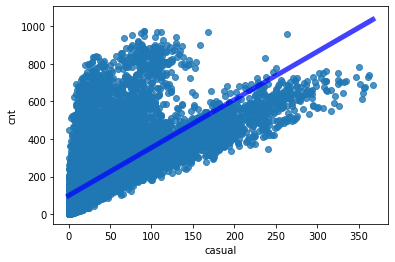

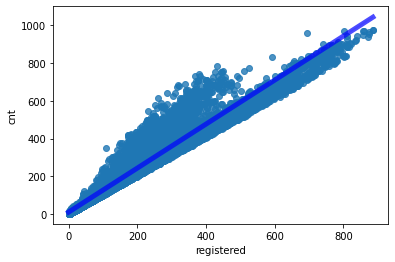

In [ ]:
# plots
cols = list(data.columns)
cols.remove('cnt')
for col in cols:
  sns.regplot(x=data[col], y=data["cnt"], line_kws={"color":"b","alpha":0.7,"lw":5}, label=col)
  plt.show()

# 3. Preprocessing

## 3.1 Feature Engineering

In [ ]:
y_cnt = data["cnt"]
y_reg = data["registered"]
y_cas = data["casual"]
targets = ["cnt", "registered", "casual"]
X = data.drop(targets, axis=1)
X_poly = X.copy()

In [ ]:
def sin_season_year(x):
	return np.sin((x / 4) * 2 * np.pi)
def sin_day_week(x):
	return np.sin((x / 7) * 2 * np.pi)
def sin_hour(x):
	decimal.getcontext().prec = 6
	tmp = decimal.getcontext().create_decimal(1.357e-05)
	return round((np.sin((x / 24) * 2 * np.pi)), 6)

In [ ]:
X_poly["season_year_sin"] = X_poly["season"].apply(sin_season_year)
X_poly["day_week_sin"] = X_poly["weekday"].apply(sin_day_week)
X_poly["hour_sin"] = X_poly["hr"].apply(sin_hour)
print(X_poly[["season_year_sin", "day_week_sin", "hour_sin"]])

       season_year_sin  day_week_sin  hour_sin
0                  1.0     -0.781831  0.000000
1                  1.0     -0.781831  0.258819
2                  1.0     -0.781831  0.500000
3                  1.0     -0.781831  0.707107
4                  1.0     -0.781831  0.866025
...                ...           ...       ...
17374              1.0      0.781831 -0.965926
17375              1.0      0.781831 -0.866025
17376              1.0      0.781831 -0.707107
17377              1.0      0.781831 -0.500000
17378              1.0      0.781831 -0.258819

[17379 rows x 3 columns]


In [ ]:
initial_columns = list(X_poly.columns)
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_poly)
poly_columns = poly.get_feature_names_out(initial_columns)
X_poly = pd.DataFrame(X_poly, columns=poly_columns)

In [ ]:
if "season_year_sin" in initial_columns:
    initial_columns.remove("season_year_sin")
    initial_columns.remove("day_week_sin")
    initial_columns.remove("hour_sin")

In [ ]:
for col in initial_columns:
  X_poly[f"{col}_log"] = X_poly[col].apply(lambda x: math.log(1+x,2))
for col in initial_columns:
  X_poly[f"{col}_log"] = X_poly[col].apply(lambda x: math.sqrt(x))

## 3.2 Separation of Test from the Dataset

As stated in the homework I will use 10 percent random split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cnt, random_state=seed,
                                                    test_size = 0.1,
                                                    shuffle=True)

In [ ]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_cnt, random_state=seed,
                                                    test_size = 0.1,
                                                    shuffle=True)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x,
# pd.DataFrame({'ylo':ylo,'yhi':yhi}),test_size=0.1, random_state=1)

## 3.3 Normalization

In [ ]:
features_to_normalize = X.columns

In [ ]:
set_config(transform_output="pandas")
sc_pipe = Pipeline([
    ('scaler', StandardScaler())
])

pipe = ColumnTransformer(transformers=[
    ("sc", sc_pipe, features_to_normalize),
])

In [ ]:
X_train_tr = pipe.fit_transform(X_train)
X_test_tr = pipe.transform(X_test)

In [ ]:
poly_features_to_normalize = X_poly.columns

In [ ]:
set_config(transform_output="pandas")
sc_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])

pipe = ColumnTransformer(transformers=[
    ("sc", sc_pipe, poly_features_to_normalize),
])

In [ ]:
X_train_poly_tr = pipe.fit_transform(X_train_poly)
X_test_poly_tr = pipe.transform(X_test_poly)

# 4. Regression Models

This is a function to output the resulting metrics of the regression, if no feature count is provided it takes value 1, and as a result R2 and R2 adjusted values are going to be the same.

In [ ]:
def print_reg_metrics(true_values_train, predicted_values_train, featurecount=1, cval=1):
    n = len(true_values_train)/cval
    r2 = metrics.r2_score(true_values_train, predicted_values_train)
    r2_adj = 1-(1-r2)*(n-1)/(n-featurecount)
    mae = metrics.mean_absolute_error(true_values_train, predicted_values_train)
    mse = metrics.mean_squared_error(true_values_train, predicted_values_train)
    rmse = np.sqrt(metrics.mean_squared_error(true_values_train, predicted_values_train))
    print(
        f"R2 score: {r2}",
        f"\nR2 Adjusted: {r2_adj}",
        f"\nRMS Error: {rmse}",
        f"\nMS Error: {mse}",
        f"\nMA Error: {mae}"
          )


In [ ]:
def regression_cross_val_score(X_cval, y_cval, regressor = LinearRegression()):
    # Variables for average classification report
    originalclass_lr = []
    predictedclass_lr = []

    #Make our custom score
    def classification_report_with_r2_score(y_true, y_pred):
        originalclass_lr.extend(y_true)
        predictedclass_lr.extend(y_pred)
        return r2_score(y_true, y_pred) # return accuracy score

    outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

    # Nested CV with parameter optimization
    nested_score = cross_val_score(regressor, X=X_cval, y=y_cval, cv=outer_cv, scoring=make_scorer(classification_report_with_r2_score))

    # Average values in classification report for all folds in a K-fold Cross-validation
    print_reg_metrics(originalclass_lr, predictedclass_lr, X_cval.shape[1], cval=10)

## 4.1 Linear Regressions

### Linear Regression

In [ ]:
lin_reg = LinearRegression()
regression_cross_val_score(X_train_tr, y_train, lin_reg)

R2 score: 0.38822931287870455 
R2 Adjusted: 0.38389358866097745 
RMS Error: 142.33613676759487 
MS Error: 20259.57582992347 
MA Error: 106.40517535489403


In [ ]:
# with none linear transformation of features
lin_reg = LinearRegression()
regression_cross_val_score(X_train_poly_tr, y_train_poly, lin_reg)

R2 score: 0.6522750229106231 
R2 Adjusted: 0.6161790045276428 
RMS Error: 107.30965182947489 
MS Error: 11515.361375763123 
MA Error: 79.01851145052466


We got much better results with linear regression if we included the none-linear transformations of the features. Lets see if it will have an important role for other regressors as well.

### Lasso

In [ ]:
las_reg = Lasso()
regression_cross_val_score(X_train_tr, y_train, las_reg)

R2 score: 0.38802220729788006 
R2 Adjusted: 0.3836850152872343 
RMS Error: 142.3602275866204 
MS Error: 20266.434398514353 
MA Error: 106.17601103528033


In [ ]:
# with none linear transformation of features
las_reg = Lasso()
regression_cross_val_score(X_train_poly_tr, y_train_poly, las_reg)

R2 score: 0.5707147911919965 
R2 Adjusted: 0.5261523127690204 
RMS Error: 119.23226789498418 
MS Error: 14216.333707381275 
MA Error: 86.00261472121198


### Ridge

In [ ]:
rid_reg = Ridge()
regression_cross_val_score(X_train_tr, y_train, rid_reg)

R2 score: 0.3882300459009935 
R2 Adjusted: 0.3838943268783216 
RMS Error: 142.33605149414663 
MS Error: 20259.551554944363 
MA Error: 106.404833405689


In [ ]:
# with none linear transformation of features
rid_reg = Ridge()
regression_cross_val_score(X_train_poly_tr, y_train_poly, rid_reg)

R2 score: 0.6491077750416321 
R2 Adjusted: 0.6126829766030473 
RMS Error: 107.79725820475971 
MS Error: 11620.248876463635 
MA Error: 79.0962721098819


### Poisson Regression

I will aslo try Poisson Regression as it works better when the target feature is countable and is represented with integers.

In [ ]:
pos_reg = PoissonRegressor()
regression_cross_val_score(X_train_tr, y_train, pos_reg)

R2 score: 0.37833886699227914 
R2 Adjusted: 0.37393304748123934 
RMS Error: 143.48209194757416 
MS Error: 20587.110709652123 
MA Error: 104.77466835522245


In [ ]:
# with none linear transformation of features
pos_reg = PoissonRegressor()
regression_cross_val_score(X_train_poly_tr, y_train_poly, pos_reg)

R2 score: 0.6200987773632887 
R2 Adjusted: 0.5806626642868133 
RMS Error: 112.16469708599257 
MS Error: 12580.919272392472 
MA Error: 79.29294116166267


## 4.2 KNN Regressor

### Base Model

In [ ]:
kn_reg = KNeighborsRegressor()
regression_cross_val_score(X_train_tr, y_train, kn_reg)

R2 score: 0.644691326812558 
R2 Adjusted: 0.6421731930550283 
RMS Error: 108.473523309859 
MS Error: 11766.505259254523 
MA Error: 71.80695607697717


In [ ]:
# with none linear transformation of features
kn_reg = KNeighborsRegressor()
regression_cross_val_score(X_train_poly_tr, y_train_poly, kn_reg)

R2 score: 0.7413523555275061 
R2 Adjusted: 0.7145031190770742 
RMS Error: 92.54971932232016 
MS Error: 8565.45054664024 
MA Error: 58.01966626174797


### Hyperparameter Tuning

In [ ]:
%%time

def objective(space):
    params =     params = {
        "n_neighbors": int(space["n_neighbors"]),
        "leaf_size": int(space["leaf_size"])
    }

    reg = KNeighborsRegressor(
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1 * score, params))
    return {'loss': -1 * score, 'status': STATUS_OK }

space = {
    "n_neighbors": hp.choice("n_neighbors", range(1, 30, 4)),
    "leaf_size": hp.choice("leaf_size", range(10, 50, 5))
    }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 13361.291 params {'n_neighbors': 21, 'leaf_size': 25}
MSE 13653.799 params {'n_neighbors': 25, 'leaf_size': 25}
MSE 15612.666 params {'n_neighbors': 1, 'leaf_size': 35}
MSE 13361.131 params {'n_neighbors': 21, 'leaf_size': 10}
MSE 13013.357 params {'n_neighbors': 17, 'leaf_size': 10}
MSE 12559.136 params {'n_neighbors': 13, 'leaf_size': 45}
MSE 13013.351 params {'n_neighbors': 17, 'leaf_size': 40}
MSE 13653.786 params {'n_neighbors': 25, 'leaf_size': 45}
MSE 12122.374 params {'n_neighbors': 9, 'leaf_size': 35}
MSE 13361.291 params {'n_neighbors': 21, 'leaf_size': 15}
100%|██████████| 10/10 [00:53<00:00,  5.34s/it, best loss: 12122.373903606398]
{'leaf_size': 35, 'n_neighbors': 9}
CPU times: user 41.4 s, sys: 58.9 ms, total: 41.4 s
Wall time: 53.4 s


In [ ]:
%%time

def objective(space):
    params =     params = {
        "n_neighbors": int(space["n_neighbors"]),
        "leaf_size": int(space["leaf_size"])
    }

    reg = KNeighborsRegressor(
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_poly_tr, y_train_poly, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1 * score, params))
    return {'loss': -1 * score, 'status': STATUS_OK }

space = {
    "n_neighbors": hp.choice("n_neighbors", range(1, 30, 4)),
    "leaf_size": hp.choice("leaf_size", range(10, 50, 5))
    }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 11456.740 params {'n_neighbors': 1, 'leaf_size': 20}
MSE 10605.276 params {'n_neighbors': 25, 'leaf_size': 10}
MSE 9894.795 params {'n_neighbors': 17, 'leaf_size': 40}
MSE 10272.334 params {'n_neighbors': 21, 'leaf_size': 25}
MSE 10605.276 params {'n_neighbors': 25, 'leaf_size': 20}
MSE 9010.517 params {'n_neighbors': 9, 'leaf_size': 25}
MSE 11456.740 params {'n_neighbors': 1, 'leaf_size': 30}
MSE 10272.334 params {'n_neighbors': 21, 'leaf_size': 45}
MSE 9010.517 params {'n_neighbors': 9, 'leaf_size': 10}
MSE 11456.740 params {'n_neighbors': 1, 'leaf_size': 35}
100%|██████████| 10/10 [00:53<00:00,  5.33s/it, best loss: 9010.516784992833]
{'leaf_size': 25, 'n_neighbors': 9}
CPU times: user 1min 1s, sys: 150 ms, total: 1min 1s
Wall time: 53.3 s


In [ ]:
%%time

def objective(space):
    params =     params = {
        "n_neighbors": int(space["n_neighbors"]),
        "leaf_size": int(space["leaf_size"])
    }

    reg = KNeighborsRegressor(
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_poly, y_train_poly, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1 * score, params))
    return {'loss': -1 * score, 'status': STATUS_OK }

space = {
    "n_neighbors": hp.choice("n_neighbors", range(1, 30, 4)),
    "leaf_size": hp.choice("leaf_size", range(10, 50, 5))
    }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 4639.895 params {'n_neighbors': 9, 'leaf_size': 45}
MSE 5022.567 params {'n_neighbors': 5, 'leaf_size': 30}
MSE 4639.895 params {'n_neighbors': 9, 'leaf_size': 30}
MSE 6752.000 params {'n_neighbors': 1, 'leaf_size': 40}
MSE 5454.447 params {'n_neighbors': 25, 'leaf_size': 15}
MSE 4639.895 params {'n_neighbors': 9, 'leaf_size': 35}
MSE 5454.447 params {'n_neighbors': 25, 'leaf_size': 10}
MSE 4731.433 params {'n_neighbors': 13, 'leaf_size': 45}
MSE 6752.000 params {'n_neighbors': 1, 'leaf_size': 35}
MSE 6752.000 params {'n_neighbors': 1, 'leaf_size': 15}
100%|██████████| 10/10 [00:58<00:00,  5.86s/it, best loss: 4639.895079030886]
{'leaf_size': 45, 'n_neighbors': 9}
CPU times: user 1min 2s, sys: 151 ms, total: 1min 2s
Wall time: 58.6 s


### Results on Test Set

In [ ]:
kn_reg = KNeighborsRegressor(n_neighbors=9, leaf_size=35)
kn_reg.fit(X_train_poly, y_train_poly)
predictions = kn_reg.predict(X_test_poly)

print_reg_metrics(y_test_poly, predictions, X_train_poly_tr.shape[1])

R2 score: 0.8656206678876167 
R2 Adjusted: 0.8531969183149624 
RMS Error: 64.45284837999122 
MS Error: 4154.169664294137 
MA Error: 41.05197545070963


This is surprisingly a very good results, I noticed that KNN regressor gave better results on not normalized data, though I would not anticipate that.

## 4.3 Decision Tree Regressor

### Base Model

In [ ]:
dt_reg = DecisionTreeRegressor()
regression_cross_val_score(X_train_tr, y_train, dt_reg)

R2 score: 0.8896072930195006 
R2 Adjusted: 0.8888249208934871 
RMS Error: 60.46318681572325 
MS Error: 3655.7969599130492 
MA Error: 35.05143533022185


In [ ]:
# with none linear transformation of features
dt_reg = DecisionTreeRegressor()
regression_cross_val_score(X_train_poly_tr, y_train_poly, dt_reg)

R2 score: 0.8839645848987232 
R2 Adjusted: 0.8719193860992827 
RMS Error: 61.98921294530125 
MS Error: 3842.662521577904 
MA Error: 36.873537497602456


### Hyperparameter Tuning

In [ ]:
%%time

def objective(space):
    params = {
        'max_depth': space['max_depth'],
        'min_samples_split': space['min_samples_split'],
        'min_samples_leaf': space['min_samples_leaf'],
        #'min_weight_fraction_leaf': float('{:.5f}'.format(space['min_weight_fraction_leaf'])),
        'max_features': space['max_features'],
    }

    reg = DecisionTreeRegressor(
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'max_depth': hp.choice('max_depth', [10, 20, 30, 40, 50, 60, None]),
        'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
        'min_samples_leaf': hp.choice('min_samples_leaf',[1, 2, 4]),
        #'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0, 0.5),
        'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2'])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 8291.662 params {'max_depth': 60, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
MSE 9282.537 params {'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
MSE 2899.700 params {'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto'}
MSE 8895.863 params {'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}
MSE 9456.612 params {'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}
MSE 3503.068 params {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto'}
MSE 2895.159 params {'max_depth': 60, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto'}
MSE 2888.377 params {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto'}
MSE 8688.521 params {'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
MSE 11216.424 

In [ ]:
%%time

def objective(space):
    params = {
        'max_depth': space['max_depth'],
        'min_samples_split': space['min_samples_split'],
        'min_samples_leaf': space['min_samples_leaf'],
        #'min_weight_fraction_leaf': float('{:.5f}'.format(space['min_weight_fraction_leaf'])),
        'max_features': space['max_features'],
    }

    reg = DecisionTreeRegressor(
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_poly_tr, y_train_poly, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'max_depth': hp.choice('max_depth', [10, 20, 30, 40, 50, 60, None]),
        'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
        'min_samples_leaf': hp.choice('min_samples_leaf',[1, 2, 4]),
        #'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0, 0.5),
        'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2'])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 4236.324 params {'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}
MSE 3989.333 params {'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto'}
MSE 4844.561 params {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
MSE 3617.936 params {'max_depth': 60, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
MSE 4147.652 params {'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
MSE 3775.136 params {'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
MSE 5073.907 params {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
MSE 4218.399 params {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto'}
MSE 4105.418 params {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
MSE 4437.973 p

### Results on Test Set

In [ ]:
dt_reg = DecisionTreeRegressor(max_depth=None, max_features='auto', min_samples_leaf=4, min_samples_split=2)
dt_reg.fit(X_train_tr, y_train)
predictions = dt_reg.predict(X_test_tr)

print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.9100986937476545 
R2 Adjusted: 0.9095257422014345 
RMS Error: 52.71799406593771 
MS Error: 2779.1868983362433 
MA Error: 31.111556797632748


## 4.4 Random Forest Regressor

### Base Model

In [ ]:
rf_reg = RandomForestRegressor(random_state=seed)
regression_cross_val_score(X_train_tr, y_train, rf_reg)

R2 score: 0.9440955653571151 
R2 Adjusted: 0.9436993610010351 
RMS Error: 43.0272878664951 
MS Error: 1851.3475011462367 
MA Error: 25.700877379658465


In [ ]:
# with none linear transformation of features
rf_reg = RandomForestRegressor(random_state=seed)
regression_cross_val_score(X_train_poly_tr, y_train_poly, rf_reg)

R2 score: 0.9459412165087798 
R2 Adjusted: 0.9403295780840857 
RMS Error: 42.31106688962064 
MS Error: 1790.2263813379523 
MA Error: 25.672041224072267


Not substantial difference but the model with a lot of features was much slower.

### Hyperparameter Tuning

In [ ]:
%%time

def objective(space):
    params = {
        'max_depth': space['max_depth'],
        'min_samples_split': space['min_samples_split'],
        'min_samples_leaf': space['min_samples_leaf'],
        #'min_weight_fraction_leaf': float('{:.5f}'.format(space['min_weight_fraction_leaf'])),
        'max_features': space['max_features'],
        'n_estimators': space['n_estimators']
    }

    reg = RandomForestRegressor(
        random_state=seed,
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'max_depth': hp.choice('max_depth', [10, 20, 30, 40, 50, 60, None]),
        'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
        'min_samples_leaf': hp.choice('min_samples_leaf',[1, 2, 4]),
        #'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0, 0.5),
        'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
        'n_estimators': hp.choice('n_estimators', [800, 1000, 1200, 1400, 1600, 1800])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 1948.454 params {'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'n_estimators': 600}
MSE 3403.402 params {'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'n_estimators': 200}
MSE 4558.116 params {'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'n_estimators': 200}
MSE 4118.260 params {'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'n_estimators': 600}
MSE 4533.903 params {'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'n_estimators': 800}
MSE 1811.682 params {'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'n_estimators': 1000}
MSE 4264.042 params {'max_depth': 60, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'n_estimators': 600}
MSE 7393.788 params {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'm

In [ ]:
%%time

def objective(space):
    params = {
        'max_depth': space['max_depth'],
        'min_samples_split': space['min_samples_split'],
        'min_samples_leaf': space['min_samples_leaf'],
        #'min_weight_fraction_leaf': float('{:.5f}'.format(space['min_weight_fraction_leaf'])),
        'max_features': space['max_features'],
        'n_estimators': space['n_estimators']
    }

    reg = RandomForestRegressor(
        random_state=seed,
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_poly_tr, y_train_poly, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'max_depth': hp.choice('max_depth', [10, 20, 30, 40, 50, 60, None]),
        'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
        'min_samples_leaf': hp.choice('min_samples_leaf',[1, 2, 4]),
        #'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0, 0.5),
        'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
        'n_estimators': hp.choice('n_estimators', [800, 1000, 1200, 1400, 1600, 1800])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 1888.323 params {'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'n_estimators': 1200}
MSE 2072.409 params {'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'n_estimators': 800}
MSE 1839.387 params {'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'n_estimators': 1200}
MSE 2069.557 params {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'n_estimators': 1000}
MSE 2598.498 params {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'n_estimators': 1600}
MSE 1731.924 params {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'n_estimators': 1200}
MSE 2030.007 params {'max_depth': 60, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'n_estimators': 1200}
 70%|███████   | 7/10 [2:24:12<33:18, 666.12s/it, best loss: 1731.92390970

Models with none-linear features take a very long time to train and even more to tune. So for some of the models I will tune hyperparameters only for the regular features.

### Results on Test Set

In [ ]:
rf_reg = RandomForestRegressor(random_state=seed, max_depth=40, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
rf_reg.fit(X_train_tr, y_train)
predictions = rf_reg.predict(X_test_tr)

print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.9452304112731329 
R2 Adjusted: 0.9448813582742942 
RMS Error: 41.147704825753955 
MS Error: 1693.1336124273753 
MA Error: 24.344819930750575


## 4.5 SVM Regressor

### Base Model

In [ ]:
sv_reg = SVR()
regression_cross_val_score(X_train_tr, y_train, sv_reg)

R2 score: 0.372114228252037 
R2 Adjusted: 0.36766429365424846 
RMS Error: 144.1986395733195 
MS Error: 20793.2476547961 
MA Error: 93.65146267925327


In [ ]:
# with none linear transformation of features
sv_reg = SVR()
regression_cross_val_score(X_train_poly_tr, y_train_poly, sv_reg)

R2 score: 0.35962917185064935 
R2 Adjusted: 0.3149246174250564 
RMS Error: 145.62522587184048 
MS Error: 21206.70641022456 
MA Error: 95.19115090161354


### Hyperparameter Tunning

In [ ]:
%%time

def objective(space):
    params = {
        'gamma': space['gamma'],
        'C': space['C'],
        'kernel': space['kernel'],
        }

    reg = SVR(
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'gamma': hp.choice('gamma', [1, 0.1, 0.01, 0.001]),
        'C': hp.choice('C', [0.1, 1, 10, 100]),
        'kernel': hp.choice('kernel', ['rbf', 'poly', 'sigmoid']),
         }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 23310.001 params {'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
MSE 7701250922.292 params {'gamma': 1, 'C': 100, 'kernel': 'sigmoid'}
 20%|██        | 2/10 [05:53<23:56, 179.55s/it, best loss: 23310.001111440473]

In [ ]:
%%time

def objective(space):
    params = {
        'gamma': space['gamma'],
        'C': space['C'],
        'kernel': space['kernel'],
        }

    reg = SVR(
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_poly_tr, y_train_poly, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'gamma': hp.choice('gamma', [1, 0.1, 0.01, 0.001]),
        'C': hp.choice('C', [0.1, 1, 10, 100]),
        'kernel': hp.choice('kernel', ['rbf', 'poly', 'sigmoid']),
         }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

For SVM I will not complete the hyperparameter tuning as it was taking a very long time and notebook restarts the runtime, and the initial results were very bad. Thus, I think this is not the best model for the problem at the hand.

### Results on Test Set

In [ ]:
sv_reg = SVR()
sv_reg.fit(X_train_tr, y_train)
predictions = sv_reg.predict(X_test_tr)

print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.41698597423714445 
R2 Adjusted: 0.4132703576187253 
RMS Error: 134.25033475644366 
MS Error: 18023.152382217184 
MA Error: 87.87590486569066


## 4.6 Gradient Boosting Regressor

### Base Model

In [ ]:
gb_reg = GradientBoostingRegressor(random_state=seed)
regression_cross_val_score(X_train_tr, y_train, gb_reg)

R2 score: 0.8470951198422558 
R2 Adjusted: 0.8460114566235617 
RMS Error: 71.15927514475422 
MS Error: 5063.6424391268365 
MA Error: 48.42997174639815


In [ ]:
# with none linear transformation of features
gb_reg = GradientBoostingRegressor(random_state=seed)
regression_cross_val_score(X_train_poly_tr, y_train_poly, gb_reg)

R2 score: 0.9006766182937516 
R2 Adjusted: 0.8937428116179338 
RMS Error: 57.3517390132475 
MS Error: 3289.221967843656 
MA Error: 38.82331801691353


### Hyperparameter Tuning

In [ ]:
%%time

def objective(space):
    params = {
        'max_depth': space['max_depth'],
        'learning_rate': space['learning_rate'],
        'subsample': space['subsample'],
        'n_estimators': space['n_estimators']
    }

    reg = GradientBoostingRegressor(
        random_state=seed,
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'max_depth': hp.choice('max_depth', [2, 3, 4, 5, 10, 20, None]),
        'learning_rate': hp.choice('learning_rate', [0.001, 0.01, 0.1]),
        'subsample': hp.choice('subsample', [0.5, 0.75, 1]),
        'n_estimators': hp.choice('n_estimators', [800, 1000, 1200, 1400, 1600, 1800])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 1587.074 params {'max_depth': 5, 'learning_rate': 0.1, 'subsample': 1, 'n_estimators': 1800}
MSE 1454.797 params {'max_depth': 10, 'learning_rate': 0.01, 'subsample': 0.75, 'n_estimators': 1000}
MSE 10277.637 params {'max_depth': 5, 'learning_rate': 0.001, 'subsample': 1, 'n_estimators': 1400}
MSE 4426.881 params {'max_depth': 2, 'learning_rate': 0.1, 'subsample': 0.5, 'n_estimators': 1200}
MSE 6044.469 params {'max_depth': None, 'learning_rate': 0.001, 'subsample': 0.5, 'n_estimators': 1000}
MSE 10277.637 params {'max_depth': 5, 'learning_rate': 0.001, 'subsample': 1, 'n_estimators': 1400}
MSE 1562.763 params {'max_depth': 5, 'learning_rate': 0.1, 'subsample': 0.75, 'n_estimators': 1800}
MSE 16411.453 params {'max_depth': 2, 'learning_rate': 0.001, 'subsample': 1, 'n_estimators': 1800}
MSE 1609.965 params {'max_depth': 10, 'learning_rate': 0.1, 'subsample': 0.5, 'n_estimators': 1800}
MSE 1925.607 params {'max_depth': 5, 'learning_rate': 0.01, 'subsample': 1, 'n_estimators': 1800}


In [ ]:
%%time

def objective(space):
    params = {
        'max_depth': space['max_depth'],
        'learning_rate': space['learning_rate'],
        'subsample': space['subsample'],
        'n_estimators': space['n_estimators']
    }

    reg = GradientBoostingRegressor(
        random_state=seed,
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_poly_tr, y_train_poly, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'max_depth': hp.choice('max_depth', [2, 3, 4, 5, 10, 20, None]),
        'learning_rate': hp.choice('learning_rate', [0.001, 0.01, 0.1]),
        'subsample': hp.choice('subsample', [0.5, 0.75, 1]),
        'n_estimators': hp.choice('n_estimators', [800, 1000, 1200, 1400, 1600, 1800])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

### Results on Test Set

In [ ]:
gb_reg = GradientBoostingRegressor(random_state=seed, max_depth=10, learning_rate=0.01, subsample=0.75, n_estimators=1000)
gb_reg.fit(X_train_tr, y_train)
predictions = gb_reg.predict(X_test_tr)

print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.9583828220279748 
R2 Adjusted: 0.9581175908821508 
RMS Error: 35.86841531319617 
MS Error: 1286.5432170799254 
MA Error: 21.433781006268745


## 4.7 Ada Boost Regressor

### Base Model

In [ ]:
ada_reg = AdaBoostRegressor(random_state=seed)
regression_cross_val_score(X_train_tr, y_train, ada_reg)

R2 score: 0.6563980482054967 
R2 Adjusted: 0.6539628819985903 
RMS Error: 106.67156168406724 
MS Error: 11378.822072117762 
MA Error: 86.29728861216367


In [ ]:
# with none linear transformation of features
ada_reg = AdaBoostRegressor(random_state=seed)
regression_cross_val_score(X_train_poly_tr, y_train_poly, ada_reg)

R2 score: 0.6496516581848086 
R2 Adjusted: 0.613283318203993 
RMS Error: 107.71368290177573 
MS Error: 11602.237484264293 
MA Error: 94.00320242580923


### Hyperparameter Tuning

In [ ]:
%%time

def objective(space):
    params = {
        #'max_depth': space['max_depth'],
        'learning_rate': space['learning_rate'],
        #'subsample': space['subsample'],
        'n_estimators': space['n_estimators']
    }

    reg = AdaBoostRegressor(
        random_state=seed,
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        #'max_depth': hp.choice('max_depth', [2, 3, 4, 5, 10, 20, None]),
        'learning_rate': hp.choice('learning_rate', [0.001, 0.01, 0.1]),
        #'subsample': hp.choice('subsample', [0.5, 0.75, 1]),
        'n_estimators': hp.choice('n_estimators', [800, 1000, 1200, 1400, 1600, 1800])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 11108.406 params {'learning_rate': 0.1, 'n_estimators': 1200}
MSE 11108.406 params {'learning_rate': 0.1, 'n_estimators': 800}
MSE 11633.403 params {'learning_rate': 0.01, 'n_estimators': 1800}
MSE 11108.406 params {'learning_rate': 0.1, 'n_estimators': 800}
MSE 16592.369 params {'learning_rate': 0.001, 'n_estimators': 1000}
MSE 11886.125 params {'learning_rate': 0.01, 'n_estimators': 1600}
MSE 16650.776 params {'learning_rate': 0.001, 'n_estimators': 800}
MSE 16592.369 params {'learning_rate': 0.001, 'n_estimators': 1000}
MSE 12405.296 params {'learning_rate': 0.01, 'n_estimators': 1200}
MSE 16429.315 params {'learning_rate': 0.001, 'n_estimators': 1400}
100%|██████████| 10/10 [36:23<00:00, 218.37s/it, best loss: 11108.4059856844]
{'learning_rate': 0.1, 'n_estimators': 1200}
CPU times: user 34min 4s, sys: 5.68 s, total: 34min 10s
Wall time: 36min 23s


In [ ]:
%%time

def objective(space):
    params = {
        #'max_depth': space['max_depth'],
        'learning_rate': space['learning_rate'],
        #'subsample': space['subsample'],
        'n_estimators': space['n_estimators']
    }

    reg = AdaBoostRegressor(
        random_state=seed,
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_poly_tr, y_train_poly, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        #'max_depth': hp.choice('max_depth', [2, 3, 4, 5, 10, 20, None]),
        'learning_rate': hp.choice('learning_rate', [0.001, 0.01, 0.1]),
        #'subsample': hp.choice('subsample', [0.5, 0.75, 1]),
        'n_estimators': hp.choice('n_estimators', [800, 1000, 1200, 1400, 1600, 1800])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

### Results on the Test Set

In [ ]:
ada_reg = AdaBoostRegressor(random_state=seed)
ada_reg.fit(X_train_tr, y_train)
predictions = ada_reg.predict(X_test_tr)

print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.6428214541522843 
R2 Adjusted: 0.6405451134777045 
RMS Error: 105.0796356570819 
MS Error: 11041.729829825077 
MA Error: 85.40189299962708


## 4.8 Cat Boost Regressor

### Base Model

In [ ]:
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
regression_cross_val_score(X_train_tr, y_train, cat_reg)

R2 score: 0.9524723542097873 
R2 Adjusted: 0.9521355175989424 
RMS Error: 39.67290419862621 
MS Error: 1573.9393275533732 
MA Error: 24.510577271167644


In [ ]:
# with none linear transformation of features
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
regression_cross_val_score(X_train_poly_tr, y_train_poly, cat_reg)

R2 score: 0.9571714022710527 
R2 Adjusted: 0.9527255270742762 
RMS Error: 37.66064639126411 
MS Error: 1418.3242866078344 
MA Error: 23.387259820357613


### Hyperparameter Tuning

In [ ]:
%%time

def objective(space):
    params = {
        'depth': space['depth'],
        'learning_rate': space['learning_rate'],
        'iterations': space['iterations']
    }

    reg = CatBoostRegressor(
        random_state=seed,
        verbose=False,
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'depth': hp.choice('depth', [2, 4, 6, 8, 10, 12]),
        'learning_rate': hp.choice('learning_rate', [0.05, 0.1, 0.2]),
        'iterations': hp.choice('iterations', [30, 50, 100])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 2364.202 params {'depth': 8, 'learning_rate': 0.2, 'iterations': 30}
MSE 3522.814 params {'depth': 6, 'learning_rate': 0.1, 'iterations': 50}
MSE 5245.445 params {'depth': 12, 'learning_rate': 0.05, 'iterations': 30}
MSE 1673.392 params {'depth': 10, 'learning_rate': 0.1, 'iterations': 100}
MSE 8531.561 params {'depth': 4, 'learning_rate': 0.1, 'iterations': 30}
MSE 9358.330 params {'depth': 2, 'learning_rate': 0.2, 'iterations': 50}
MSE 6068.295 params {'depth': 6, 'learning_rate': 0.05, 'iterations': 50}
MSE 3336.401 params {'depth': 10, 'learning_rate': 0.05, 'iterations': 50}
MSE 1545.671 params {'depth': 12, 'learning_rate': 0.2, 'iterations': 50}
MSE 1673.392 params {'depth': 10, 'learning_rate': 0.1, 'iterations': 100}
100%|██████████| 10/10 [00:46<00:00,  4.69s/it, best loss: 1545.6714394636206]
{'depth': 12, 'iterations': 50, 'learning_rate': 0.2}
CPU times: user 1min, sys: 5.71 s, total: 1min 6s
Wall time: 46.9 s


In [ ]:
%%time

def objective(space):
    params = {
        'depth': space['depth'],
        'learning_rate': space['learning_rate'],
        'iterations': space['iterations']
    }

    reg = CatBoostRegressor(
        random_state=seed,
        verbose=False,
        **params
    )

    kf = KFold(n_splits=10)
    score = cross_val_score(reg, X_train_poly_tr, y_train_poly, scoring='neg_mean_squared_error', cv=kf).mean()
    print("MSE {:.3f} params {}".format(-1*score, params))
    return {'loss':-1*score, 'status': STATUS_OK }

space = {
        'depth': hp.choice('depth', [2, 4, 6, 8, 10, 12]),
        'learning_rate': hp.choice('learning_rate', [0.05, 0.1, 0.2]),
        'iterations': hp.choice('iterations', [30, 50, 100])
        }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
best_hyp = space_eval(space, best)
print(best_hyp)

MSE 2744.365 params {'depth': 6, 'learning_rate': 0.1, 'iterations': 50}
MSE 2238.167 params {'depth': 8, 'learning_rate': 0.05, 'iterations': 100}
MSE 6668.836 params {'depth': 4, 'learning_rate': 0.05, 'iterations': 50}
MSE 5152.832 params {'depth': 10, 'learning_rate': 0.05, 'iterations': 30}
MSE 2349.438 params {'depth': 12, 'learning_rate': 0.1, 'iterations': 30}
MSE 2539.455 params {'depth': 10, 'learning_rate': 0.1, 'iterations': 30}
MSE 1794.467 params {'depth': 12, 'learning_rate': 0.05, 'iterations': 100}
MSE 2966.425 params {'depth': 10, 'learning_rate': 0.05, 'iterations': 50}
MSE 2814.228 params {'depth': 4, 'learning_rate': 0.1, 'iterations': 100}
MSE 2966.425 params {'depth': 10, 'learning_rate': 0.05, 'iterations': 50}
100%|██████████| 10/10 [14:43<00:00, 88.34s/it, best loss: 1794.4673650059842]
{'depth': 12, 'iterations': 100, 'learning_rate': 0.05}
CPU times: user 23min 6s, sys: 14.2 s, total: 23min 20s
Wall time: 14min 43s


### Results on the Test Set

In [ ]:
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
cat_reg.fit(X_train_tr, y_train)
predictions = cat_reg.predict(X_test_tr)

print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.9563441202556533 
R2 Adjusted: 0.9560658962248376 
RMS Error: 36.736455230295256 
MS Error: 1349.5671428874875 
MA Error: 23.319928429923735


# 5. Validation on the Second Year Data

As we have already chosen the best model, in this section I will test the results on the second year data, as stated in the homework.

In [ ]:
y_train_cnt = data["cnt"][data["yr"]==0]
y_test_cnt = data["cnt"][data["yr"]==1]

In [ ]:
X_train_y1 = X[X["yr"]==0]
X_test_y2 = X[X["yr"]==1]

In [ ]:
features_to_normalize = X.columns

In [ ]:
set_config(transform_output="pandas")
sc_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])

pipe = ColumnTransformer(transformers=[
    ("sc", sc_pipe, features_to_normalize),
])

In [ ]:
X_train_y1_tr = pipe.fit_transform(X_train_y1)
X_test_y2_tr = pipe.transform(X_test_y2)

## 5.1 Best Models

In [ ]:
rf_reg = RandomForestRegressor(random_state=seed, max_depth=40, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
rf_reg.fit(X_train_y1_tr, y_train_cnt)
predictions = rf_reg.predict(X_test_y2_tr)

print_reg_metrics(y_test_cnt, predictions, X_train.shape[1])

R2 score: 0.6408469662080496 
R2 Adjusted: 0.6403940100773786 
RMS Error: 125.19185979939972 
MS Error: 15673.001760032555 
MA Error: 88.7241913855753


In [ ]:
gb_reg = GradientBoostingRegressor(random_state=seed, max_depth=10, learning_rate=0.01, subsample=0.75, n_estimators=1000)
gb_reg.fit(X_train_y1_tr, y_train_cnt)
predictions = gb_reg.predict(X_test_y2_tr)

print_reg_metrics(y_test_cnt, predictions, X_train.shape[1])

R2 score: 0.647927949499051 
R2 Adjusted: 0.6474839237531773 
RMS Error: 123.95158836338987 
MS Error: 15363.996257807248 
MA Error: 88.59803456459684


In [ ]:
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
cat_reg.fit(X_train_y1_tr, y_train_cnt)
predictions = cat_reg.predict(X_test_y2_tr)

print_reg_metrics(y_test_cnt, predictions, X_train.shape[1])

R2 score: 0.6420560572069381 
R2 Adjusted: 0.6416046259559953 
RMS Error: 124.98095254387532 
MS Error: 15620.238498774415 
MA Error: 90.05240745814466


## 5.2 Results

We got much worse results in this case, but it was expected. Before we split the data randomly and took only 10 pecent as test data. As a result of that split our training data was very big and probably contained information about every day, thus it was much better at predicting the number of the rentals. In other words previously we had data leakage, and our results supposedly were close to the results on the train set. To check the point that I made I will check the models metrics on the train data and lets see if the results will be closer to the results we had before. I think Yes.

In [ ]:
rf_reg = RandomForestRegressor(random_state=seed, max_depth=40, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
rf_reg.fit(X_train_y1_tr, y_train_cnt)
predictions = rf_reg.predict(X_train_y1_tr)

print_reg_metrics(y_train_cnt, predictions, X_train.shape[1])

R2 score: 0.9835426433471002 
R2 Adjusted: 0.9835216737046605 
RMS Error: 17.163429443143517 
MS Error: 294.58331024976576 
MA Error: 10.21089333534859


In [ ]:
gb_reg = GradientBoostingRegressor(random_state=seed, max_depth=10, learning_rate=0.01, subsample=0.75, n_estimators=1000)
gb_reg.fit(X_train_y1_tr, y_train_cnt)
predictions = gb_reg.predict(X_train_y1_tr)

print_reg_metrics(y_train_cnt, predictions, X_train.shape[1])

R2 score: 0.9974672892681327 
R2 Adjusted: 0.9974640621375812 
RMS Error: 6.733127273604952 
MS Error: 45.33500288256285 
MA Error: 4.5619815801169485


In [ ]:
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
cat_reg.fit(X_train_y1_tr, y_train_cnt)
predictions = cat_reg.predict(X_train_y1_tr)

print_reg_metrics(y_train_cnt, predictions, X_train.shape[1])

R2 score: 0.9673548531446147 
R2 Adjusted: 0.9673132573360418 
RMS Error: 24.17315528224508 
MS Error: 584.3414362995331 
MA Error: 15.791228042653778


We can see that the results we had with random split were overly optimistic.

## 5.3 Another Way to Split the Data

In this case I will use time series split but will leave one last month of 2nd year as test set, so that we also train on second year data.

In [ ]:
y_train_cnt = data["cnt"][((data["yr"]==1) & (data["mnth"]==12)) == False]
y_test_cnt = data["cnt"][(data["yr"]==1) & (data["mnth"]==12)]

In [ ]:
X_train_ex = X[((X["yr"]==1) & (X["mnth"]==12)) == False]
X_test_ex = X[(X["yr"]==1) & (X["mnth"]==12)]

In [ ]:
features_to_normalize = X_train_ex.columns

In [ ]:
set_config(transform_output="pandas")
sc_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])

pipe = ColumnTransformer(transformers=[
    ("sc", sc_pipe, features_to_normalize),
])

In [ ]:
X_train_ex_tr = pipe.fit_transform(X_train_ex)
X_test_ex_tr = pipe.transform(X_test_ex)

In [ ]:
rf_reg = RandomForestRegressor(random_state=seed, max_depth=40, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
rf_reg.fit(X_train_ex_tr, y_train_cnt)
predictions = rf_reg.predict(X_test_ex_tr)

print_reg_metrics(y_test_cnt, predictions, X_train_ex_tr.shape[1])

R2 score: 0.8013633727517293 
R2 Adjusted: 0.7983702180945635 
RMS Error: 73.44205348673431 
MS Error: 5393.735220348342 
MA Error: 45.94035747515438


In [ ]:
gb_reg = GradientBoostingRegressor(random_state=seed, max_depth=10, learning_rate=0.01, subsample=0.75, n_estimators=1000)
gb_reg.fit(X_train_ex_tr, y_train_cnt)
predictions = gb_reg.predict(X_test_ex_tr)

print_reg_metrics(y_test_cnt, predictions, X_train_ex_tr.shape[1])

R2 score: 0.8261283084873999 
R2 Adjusted: 0.8235083240947443 
RMS Error: 68.7115245838445 
MS Error: 4721.273610636265 
MA Error: 42.87308866629959


In [ ]:
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
cat_reg.fit(X_train_ex_tr, y_train_cnt)
predictions = cat_reg.predict(X_test_ex_tr)

print_reg_metrics(y_test_cnt, predictions, X_train_ex_tr.shape[1])

R2 score: 0.8617261598615635 
R2 Adjusted: 0.8596425814485186 
RMS Error: 61.27525924846178 
MS Error: 3754.657395966201 
MA Error: 38.399525683373255


We can see that in this case the results are not very bad, but still not close to the results that we got when we used random split. Nevertheless, I think this would get us more realistic metrics for our results, that will be later used in practice. In other parts of the homework I will use random split again, as it was stated in the homework.

# 6. Multitarget Regression

In [ ]:
y_train_comp = data[["casual", "registered"]][data["yr"]==0]
y_test_comp = data[["casual", "registered"]][data["yr"]==1]

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_y1_tr, y_train_comp)
predictions = rf_reg.predict(X_test_y2_tr)

# print_reg_metrics(y_train_cnt, predictions, X_train.shape[1])

In [ ]:
predictions_cnt = predictions[:, 0] + predictions[:, 1]

In [ ]:
print_reg_metrics(y_test_cnt, predictions_cnt, X_train.shape[1])

R2 score: 0.6481474374789903 
R2 Adjusted: 0.6477036885466662 
RMS Error: 123.9129455270988 
MS Error: 15354.418069201753 
MA Error: 88.37422681474696


We got very similar results to the regular Random Forest Regression with multitarget regression of the same model, even a tiny bit of improvement. I initially would guess that the results would be slightly worse as we split one variable into 2 part, thus introducing more randomness. But I think here played its part the fact that registered rentals were extremely correlated with the overall rentals count. That made it possible to have almost identical results with both approaches.

# 7. Feature Importance

## 7.1 The Most Influential Features

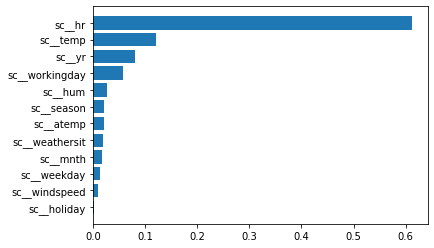

In [ ]:
model = RandomForestRegressor()

model.fit(X_train_tr, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train_tr.columns)[indices])

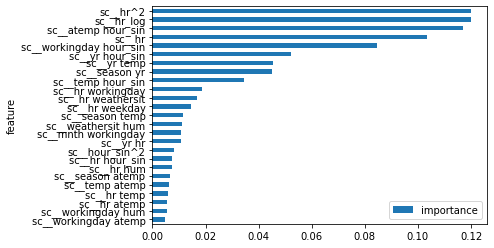

In [ ]:
model = RandomForestRegressor()

model.fit(X_train_poly_tr, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

# fig, ax = plt.subplots()
# ax.barh(range(len(importances)), importances[indices])
# ax.set_yticks(range(len(importances)))
# _ = ax.set_yticklabels(np.array(tv_X_train_lm.columns)[indices])
importances = model.feature_importances_
feature_importance = pd.DataFrame(X_train_poly_tr.columns, columns = ["feature"])
feature_importance["importance"] = list(map(lambda x: x, importances))
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
feature_importance_new = feature_importance[-20:]

ax = feature_importance_new.plot.barh(x="feature", y="importance")
plt.show()

As we can see the most decisive feature is the hr for the number of bike rentals. In the first case it had highest importance among the initial features, and in the model with new features that were none-linear transformations of the given feature, the 2 most important features are hr to the 2nd power and log of the hour. Thus hour has the most predictive power among the all features presented.

## 7.2 Comparison: Temperature or Humidity

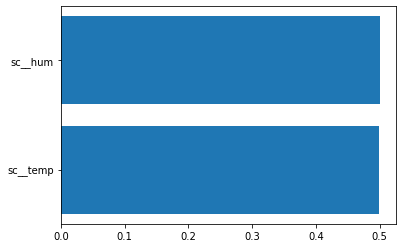

In [ ]:
model = RandomForestRegressor()

model.fit(X_train_tr[["sc__temp", "sc__hum"]], y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train_tr[["sc__temp", "sc__hum"]].columns)[indices])

## 7.3 Comparison: Current Season or Current Hour

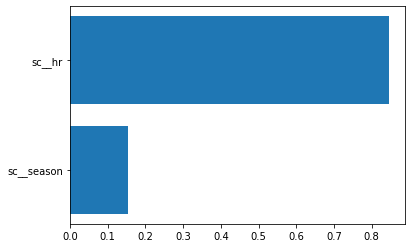

In [ ]:
model = RandomForestRegressor()

model.fit(X_train_tr[["sc__hr", "sc__season"]], y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train_tr[["sc__hr", "sc__season"]].columns)[indices])

## 7.4 Comparison: Temperature or Feeling Temperature

In the first chart above we can see that "temp" is given higher importance than "atemp", however the 2 features were almost perfectly correlated as we noticed in EDA section. Thus, the coeffitients could be randomly split between the 2 variables. To answer the question which one of those 2 variables is more important in prediction of bike rental count I will make 2 model with only 1 feature each, and compare the results. My initial guess is that they will have similar results due to high correlation with each other.

In [ ]:
rf_reg = RandomForestRegressor(random_state=seed)
regression_cross_val_score(X_train_tr[["sc__temp"]], y_train, rf_reg)

R2 score: 0.17182534621668244 
R2 Adjusted: 0.17182534621668244 
RMS Error: 165.60818961612256 
MS Error: 27426.072467929604 
MA Error: 125.1727934156855


In [ ]:
rf_reg = RandomForestRegressor(random_state=seed)
regression_cross_val_score(X_train_tr[["sc__atemp"]], y_train, rf_reg)

R2 score: 0.18585719047621685 
R2 Adjusted: 0.18585719047621685 
RMS Error: 164.19923823318516 
MS Error: 26961.389836358292 
MA Error: 123.980507535826


<AxesSubplot:>

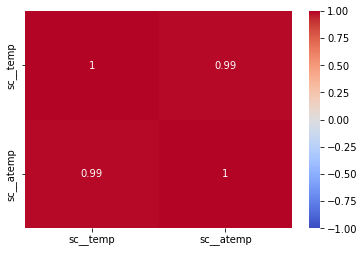

In [ ]:
corr = X_train_tr[["sc__temp", "sc__atemp"]].corr()
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

# 8. Ensemble methods

## 8.1 Averaging

In [ ]:
class AveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [ ]:
%%time
rf_reg = RandomForestRegressor(random_state=seed, max_depth=40, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=seed, max_depth=10, learning_rate=0.01, subsample=0.75, n_estimators=1000)
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
averaged_model = AveragedModels([rf_reg, gb_reg, cat_reg])
regression_cross_val_score(X_train_tr, y_train, averaged_model)

R2 score: 0.9555200660118711 
R2 Adjusted: 0.9552048290594393 
RMS Error: 38.3798178471028 
MS Error: 1473.0104179767904 
MA Error: 22.865077467471263
CPU times: user 14min 3s, sys: 5.28 s, total: 14min 8s
Wall time: 14min 36s


We got worse results than with the one model of Random Forest Regressor.

## 8.2 Weighted Average

In [ ]:
class WeightedAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
        assert sum(self.weights)==1

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.sum(predictions*self.weights, axis=1)

In [ ]:
%%time
rf_reg = RandomForestRegressor(random_state=seed, max_depth=40, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=seed, max_depth=10, learning_rate=0.01, subsample=0.75, n_estimators=1000)
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
weighted_average_model = WeightedAveragedModels([rf_reg, gb_reg, cat_reg], [0.25, 0.5, 0.25])
regression_cross_val_score(X_train_tr, y_train, weighted_average_model)

R2 score: 0.9560205880238327 
R2 Adjusted: 0.9557088983570987 
RMS Error: 38.16326749110602 
MS Error: 1456.4349855977096 
MA Error: 22.680570082762245
CPU times: user 13min 59s, sys: 4.7 s, total: 14min 4s
Wall time: 13min 53s


## 8.3 Blending

In [ ]:
class BlendingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, holdout_pct=0.2, use_features_in_secondary=False):
        self.base_models = base_models
        self.meta_model = meta_model
        self.holdout_pct = holdout_pct
        self.use_features_in_secondary = use_features_in_secondary

    def fit(self, X, y):
        self.base_models_ = [clone(x) for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)

        X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=self.holdout_pct)

        holdout_predictions = np.zeros((X_holdout.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models_):
            model.fit(X_train, y_train)
            y_pred = model.predict(X_holdout)
            holdout_predictions[:, i] = y_pred
        if self.use_features_in_secondary:
            self.meta_model_.fit(np.hstack((X_holdout, holdout_predictions)), y_holdout)
        else:
            self.meta_model_.fit(holdout_predictions, y_holdout)

        return self

    def predict(self, X):
        meta_features = np.column_stack([
            model.predict(X) for model in self.base_models_
        ])
        if self.use_features_in_secondary:
            return self.meta_model_.predict(np.hstack((X, meta_features)))
        else:
            return self.meta_model_.predict(meta_features)

In [ ]:
%%time
rf_reg = RandomForestRegressor(random_state=seed, max_depth=40, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=seed, max_depth=10, learning_rate=0.01, subsample=0.75, n_estimators=1000)
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
lasso_model = Lasso()
blending_average_model = BlendingAveragedModels([rf_reg, gb_reg, cat_reg], lasso_model)
regression_cross_val_score(X_train_tr, y_train, blending_average_model)

R2 score: 0.9553286571706304 
R2 Adjusted: 0.9550120636707766 
RMS Error: 38.46230841718677 
MS Error: 1479.3491687787962 
MA Error: 23.10786700219495
CPU times: user 11min 4s, sys: 4.92 s, total: 11min 8s
Wall time: 10min 59s


None of the ensemble methods got us better results, probably as all the models were tree based they had similar mistakes. We would have better results if we used diverse regressors, sadly in our problem, none of the other regressors had high performance.

# 9. Results

As the best model I would choose the cat boost regressor.

## 9.1 Random Forest Regressor

In [ ]:
rf_reg = RandomForestRegressor(random_state=seed, max_depth=40, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
rf_reg.fit(X_train_tr, y_train)
predictions = rf_reg.predict(X_test_tr)

print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.9452304112731329 
R2 Adjusted: 0.9448813582742942 
RMS Error: 41.147704825753955 
MS Error: 1693.1336124273753 
MA Error: 24.344819930750575


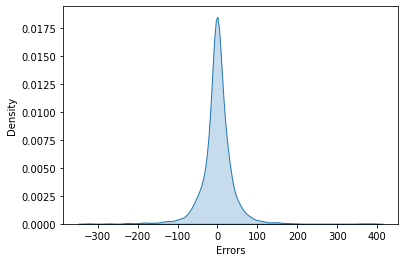

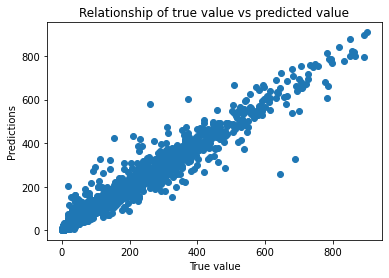

In [ ]:
#errors visualization
#can be helpful to better understand behavior of model

predictions = rf_reg.predict(X_test_tr)
errors = y_test - predictions
errors_df = pd.DataFrame(list(errors), columns = ["Errors"]).set_index(pd.RangeIndex(start=1, stop=errors.shape[0]+1, step=1))

sns.kdeplot(data=errors_df, x="Errors", shade=True)
plt.show()

plt.scatter(y_test, predictions);
plt.title('Relationship of true value vs predicted value')
plt.ylabel('Predictions');
plt.xlabel('True value');
plt.show();

## 9.2 Gradient Boosting Regressor

In [ ]:
gb_reg = GradientBoostingRegressor(random_state=seed, max_depth=10, learning_rate=0.01, subsample=0.75, n_estimators=1000)
gb_reg.fit(X_train_tr, y_train)
predictions = gb_reg.predict(X_test_tr)

print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.9583828220279748 
R2 Adjusted: 0.9581175908821508 
RMS Error: 35.86841531319617 
MS Error: 1286.5432170799254 
MA Error: 21.433781006268745


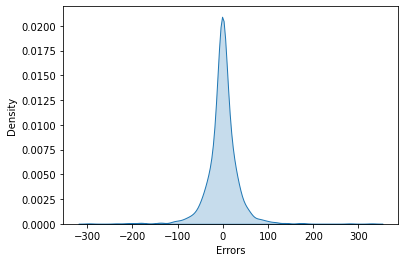

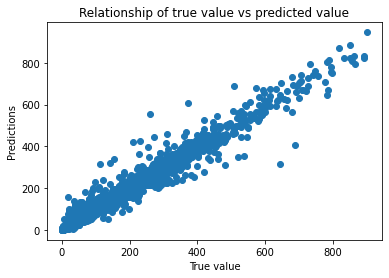

In [ ]:
#errors visualization
#can be helpful to better understand behavior of model

predictions = gb_reg.predict(X_test_tr)
errors = y_test - predictions
errors_df = pd.DataFrame(list(errors), columns = ["Errors"]).set_index(pd.RangeIndex(start=1, stop=errors.shape[0]+1, step=1))

sns.kdeplot(data=errors_df, x="Errors", shade=True)
plt.show()

plt.scatter(y_test, predictions);
plt.title('Relationship of true value vs predicted value')
plt.ylabel('Predictions');
plt.xlabel('True value');
plt.show();

## 9.3 Cat Boost Regressor

In [ ]:
cat_reg = CatBoostRegressor(verbose=False, random_state=seed)
cat_reg.fit(X_train_tr, y_train)
predictions = cat_reg.predict(X_test_tr)

print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.9563441202556533 
R2 Adjusted: 0.9560658962248376 
RMS Error: 36.736455230295256 
MS Error: 1349.5671428874875 
MA Error: 23.319928429923735


<class 'pandas.core.series.Series'>
1738


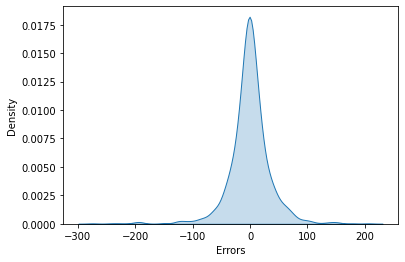

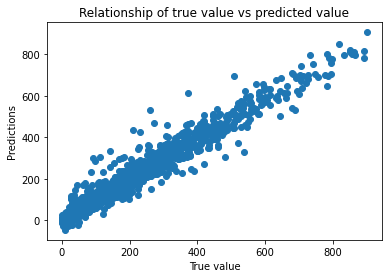

In [ ]:
#errors visualization
#can be helpful to better understand behavior of model

predictions = cat_reg.predict(X_test_tr)
errors = y_test - predictions
errors_df = pd.DataFrame(list(errors), columns = ["Errors"]).set_index(pd.RangeIndex(start=1, stop=errors.shape[0]+1, step=1))

sns.kdeplot(data=errors_df, x="Errors", shade=True)
plt.show()

plt.scatter(y_test, predictions);
plt.title('Relationship of true value vs predicted value')
plt.ylabel('Predictions');
plt.xlabel('True value');
plt.show();

All of these 3 models presented in this section performed fairly well on the problem. Just by a little margin Gradient Boosting Regressor was better, but it was very slow. Thus, I would choose Cat Boost Regressor model over the others.